**Name: -** Chinmay Bhangale

**Registration No.: -** M1910006

**Class: -** B.Tech Mechanical

# A02 Univariate Regression Model

In [ ]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

## Read Data

### Hint

df=pd.read_csv(??, header=???, names=[???]) >> keep feature names as 'population' and 'profit'

In [ ]:
df=pd.read_csv("profitdata.txt", header=None, names=["Population","Profit"])
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


## Plot Data

### Hint

ax.scatter(???, ???,marker='.',c='r',label='Entire Data')

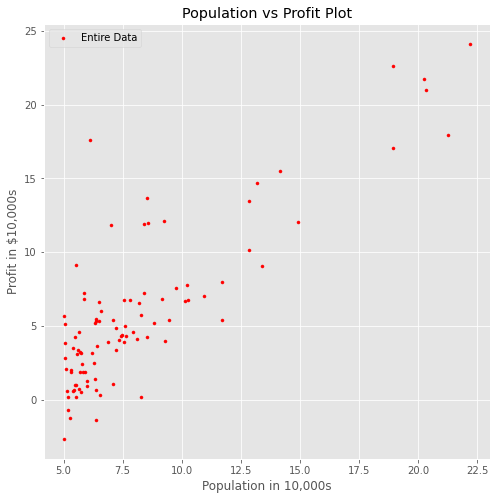

In [ ]:
fig, ax = plt.subplots() 

fig.set_figwidth(8)
fig.set_figheight(8)
# plot should be done on the `axis`: ax
ax.scatter(df.iloc[:,0],df.iloc[:,1] ,marker='.',c='r',label='Entire Data')
# Set labels for axex and title for plot

ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population vs Profit Plot')
ax.legend()
plt.show()


## Regression Model from SciKit-Learn (sklearn.linear_model.LinearRegression)

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression

In general, any model from SKLEARN library is implemented as follows

### Step 1: Import the ML model from library

from sklearn.model_category import model_name
    
### Step 2: Initiate the ML model

model = model_name(?,?,...)     where ?.?,... are model hyperparameters

### Step 3: Split the data into trainnig and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=10)

In above case, test_size= 0.25 indicates 25% of test data is randomly selected from total data and random_state=10 indicates a fixed shuffled state, random_state=None creates random shuffling for every new run


### Step 4: Fit the model to some data (Train the model)

model.fit(X,y)

### Step 5: Predict output for new/test data

ynew = model.predict(Xnew)

### Step 6: Check model performance scores

performace_score = model.name_of_scoring_method(X1, y1)

In [ ]:
#Step 1: Import the ML model from library
from sklearn import linear_model

In [ ]:
#Step 2: Split the data into trainnig and testing data
from sklearn.model_selection import train_test_split

X = df.iloc[:,0] # Population
y = df.iloc[:,1] # Profit

# Reshaping the dataset to get a 2D array.
X = X.values.reshape((X.shape[0],1))    # Shape: (m,1)
y = y.values.reshape((y.shape[0],1))    # Shape: (m,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=10)

In [ ]:
# Step 3: Initiate the ML model

reg_model = linear_model.LinearRegression()

In [ ]:
#Step 4: Fit the model to some data (Train the model)

reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Step 5: Predict output for new/test data

val = np.array([[35], [70]])    # Storing population values in a numpy array
#predict1=reg_model.predict()
#predict2=reg_model.predict()

predictions = reg_model.predict(val)    # Returns a numpy array with predicted
                                        # values

In [ ]:
print('For population = 35,000, predicted profit from SKlearn is %10.1f$'%(predictions[0]*10000))
print('For population = 70,000, predicted profit from SKlearn is %10.1f$'%(predictions[1]*10000))
print()

#Step 6: Check model performance scores

score_train = reg_model.score(X_train, y_train)
score_test = reg_model.score(X_test, y_test)

print('R^2 score for training data = %10.4f'%(score_train))
print('R^2 score for testing data  = %10.4f'%(score_test))
print()

# Inspecting model parameters

theta0 = reg_model.intercept_
theta1 = reg_model.coef_[0]
print('Theta_0 = %10.4f'%(theta0))
print('Theta_1 = %10.4f'%(theta1))

For population = 35,000, predicted profit from SKlearn is   382629.9$
For population = 70,000, predicted profit from SKlearn is   806266.5$

R^2 score for training data =     0.7608
R^2 score for testing data  =     0.2247

Theta_0 =    -4.1007
Theta_1 =     1.2104


# Visualize Training and Testing Data

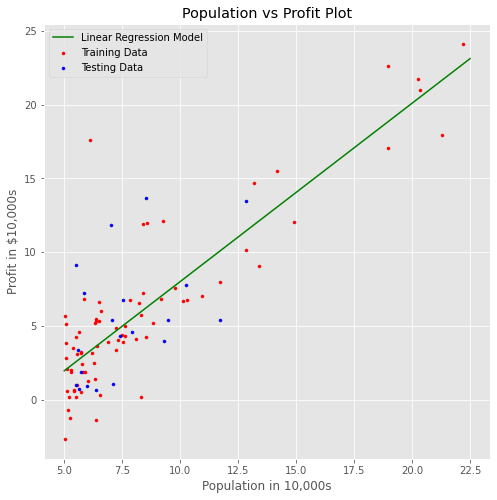

In [ ]:
fig, ax = plt.subplots() 

fig.set_figwidth(8)
fig.set_figheight(8)
# plot should be done on the `axis`: ax
ax.scatter(X_train, y_train,marker='.',c='r',label='Training Data')
ax.scatter(X_test, y_test,marker='.',c='b',label='Testing Data')

# plot regression model
# Making numpy arrays instead of python lists for easier computation.
x1 = np.array([5,22.5])
# Using np.multiply to multiply two arrays/scalars to avoid shape errors.
y1 = np.array([np.sum((theta0, np.multiply(theta1,x1[0]))), np.sum((theta0, np.multiply(theta1,x1[1])))])
ax.plot(x1, y1,marker='',c='g',label='Linear Regression Model')

# Set labels for axex and title for plot

ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population vs Profit Plot')
ax.legend()
plt.show()




# FOR REFERENCE 

# Python code for linear regression developed from classroom theory


## Compute Cost and Gradient Descent

In [ ]:
p=df.population.values
m=len(p)
X=np.array([np.ones(m),p]) #add first column to ones to X
X=np.transpose(X)
y=df.profit.values
theta=np.zeros(2)

In [ ]:
def computeCost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #  parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(X) # number of training examples

    # You need to return the following variables correctly 
    J = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    h = X @ theta
    err = h-y
    err_sqr = err**2
    J=sum(err_sqr)/(2*m)
    
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha
    
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.
        #
        h = X @ theta
        
        myErr = h-y
        myErr = np.transpose(np.array([myErr,myErr]))
        
        mySum = np.sum(X*myErr, axis=0)
        
        theta = theta - alpha*mySum/m
        # ============================================================
        # Save the cost J in every iteration    
        J_history[iter]=computeCost(X, y, theta)

        #print('#',iter,'theta',theta,'J',J_history[iter])
    
    return theta

In [ ]:
iterations = 5000
alpha = 0.01
theta = gradientDescent(X, y, theta, alpha, iterations)

## Validate your code

In [ ]:
print('With theta = [0,0], cost computed J = %10.2f'%computeCost(X,y,[0,0]), '(Expected cost = 32.07 approx.)')
print('With theta = [-1,2], cost computed J = %10.2f'%computeCost(X,y,[-1,2]), '(Expected cost = 54.24 approx.)')
print('Theta found by gradient descent= %10.4f , %10.4f'%(theta[0],theta[1]),'(Expected values: -3.8953, 1.1930)')

## Plot Training data and Regression model

In [ ]:
fig, ax = plt.subplots() 

fig.set_figwidth(5)
fig.set_figheight(5)
# plot should be done on the `axis`: ax
ax.scatter(df.population, df.profit,marker='.',c='r',label='Entire Data')
# Set labels for axex and title for plot


y_predicted=np.dot(X,np.transpose(theta))
ax.plot(df.population.values,y_predicted,c='b',label='Linear Regression')

ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population vs Profit Plot')
ax.legend()
plt.show()

## Predict values for population of 35,000 and 70,000

In [ ]:
predict1=np.dot([1, 3.5],np.transpose(theta))*10000
print('For population = 35,000, we predict a profit of %10.1f$'%predict1)
predict2=np.dot([1, 7],np.transpose(theta))*10000
print('For population = 70,000, we predict a profit of %10.1f$'%predict2)

## Visualizing J(theta_0, theta_1)

In [ ]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=[theta0_vals[i],theta1_vals[j]]
        J_vals[i,j]=computeCost(X,y,t)

J_vals=np.transpose(J_vals)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)


In [ ]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111, projection='3d')

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax1.set_zlabel('J - Cost function')

ax1.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [ ]:
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig2, ax2 = plt.subplots(1, 1)

ax2.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
ax2.xaxis.set_label_text(r'$\theta_0$')
ax2.yaxis.set_label_text(r'$\theta_1$')

ax2.plot(theta[0], theta[1], 'rx')
plt.show()